In [23]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score, v_measure_score
from sklearn import datasets
import csv

import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

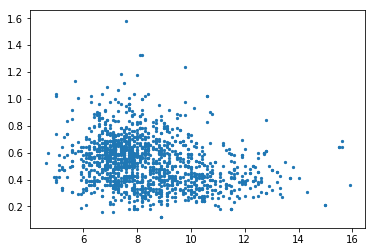

(1599, 11)
[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4   ]


In [19]:
with open('../data/winequality_red.csv', 'r') as f:
    reader = csv.reader(f)
    wine_quality_dataset = list(reader)

del wine_quality_dataset[0]
    
wine_quality_dataset_labels = np.array([int(sublist[-1]) for sublist in wine_quality_dataset])
wine_quality_dataset = [[float(numStr) if numStr else 0 for numStr in sublist[:-1]] for sublist in wine_quality_dataset]
wine_quality_dataset = np.array(wine_quality_dataset)

ClusterUtils.visualize_sample_data(wine_quality_dataset)
X = wine_quality_dataset
print(wine_quality_dataset.shape)
print(wine_quality_dataset[0])

### Test with Parallel Runs

In [10]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['GaussianMixture'], 
                                       dim_reduction_alg_ls=['TSNE'],
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                      )

Configuration space object:
  Hyperparameters:
    clustering_choice, Type: Categorical, Choices: {GaussianMixture}, Default: GaussianMixture
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    dim_reduction_choice, Type: Categorical, Choices: {TSNE}, Default: TSNE
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.0], Default: 12.0
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Default: kmeans
    n_components___GaussianMixture, Type: UniformInteger, Range: [1, 30], Default: 5
    n_components___TSNE, Type: Ordinal, Sequence: {2, 3}, Default: 2
    perplexity___TSNE, Type: UniformFloat, Range: [1.0, 300.0], Default: 30.0
    random_state___GaussianMixture, Type: UniformInteger, Range: [0, 9], Default: 0
    random_state___TSNE, Type: Ordinal, Sequence: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, Default: 0
    warm_start___GaussianMixture, Type: Categorical, Choices: {True, False}, De

In [11]:
opt_result

Configuration:
  clustering_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'full'
  dim_reduction_choice, Value: 'TSNE'
  early_exaggeration___TSNE, Value: 12.0
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 5
  n_components___TSNE, Value: 2
  perplexity___TSNE, Value: 30.0
  random_state___GaussianMixture, Value: 0
  random_state___TSNE, Value: 0
  warm_start___GaussianMixture, Value: False

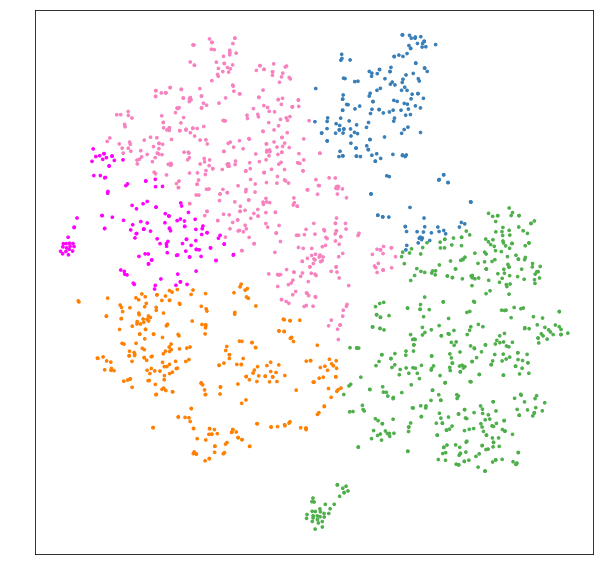

array([0, 1, 2, 3, 4])

In [12]:
predictions = autocluster.predict(X)
np.unique(predictions)

In [13]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perplexity___TSNE, Value: 30.0
   random_state___GaussianMixture, Value: 0
   random_state___TSNE, Value: 0
   warm_start___GaussianMixture, Value: False
 , ta_runs=0, ta_time_used=0, wallclock_time=0.0002989768981933594),
 TrajEntry(train_perf=2147483647.0, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perpl

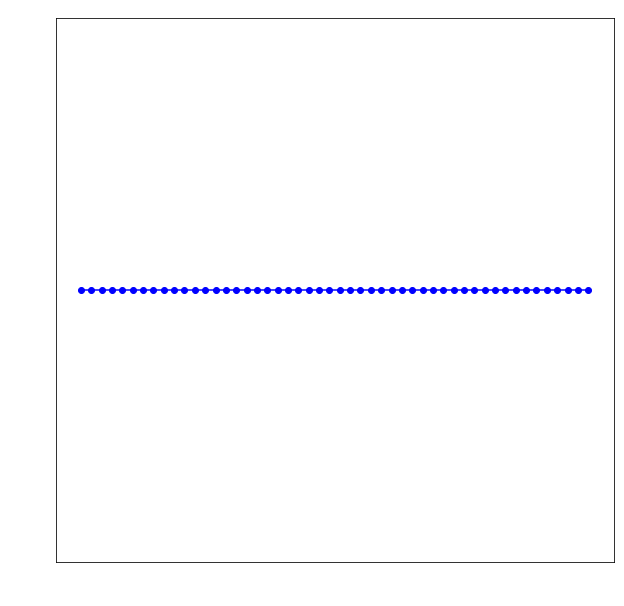

In [14]:
autocluster.plot_convergence()

In [17]:
print(type(predictions))
print(predictions.shape)
print(predictions[:10])

<class 'numpy.ndarray'>
(1599,)
[4 3 3 2 4 4 3 4 4 1]


In [21]:
print(wine_quality_dataset_labels[:10])

[5 5 5 6 5 5 5 7 7 5]


In [25]:
print(v_measure_score(labels_true=wine_quality_dataset_labels, labels_pred=predictions))

0.08637508388860961
